## Proyecto de Clustering

### Importar librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos 

In [2]:
df_country = pd.read_csv('country-data.csv')

In [3]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Manejando valores nulos

In [5]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Validando dulpicados

In [6]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Análisis de distribución

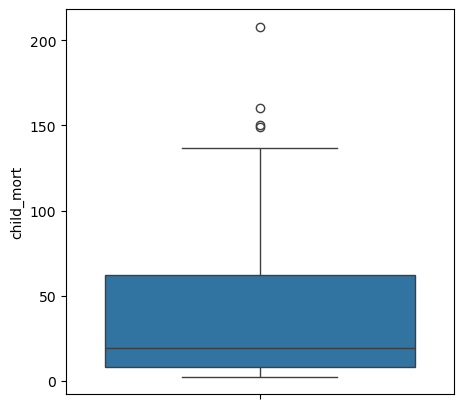

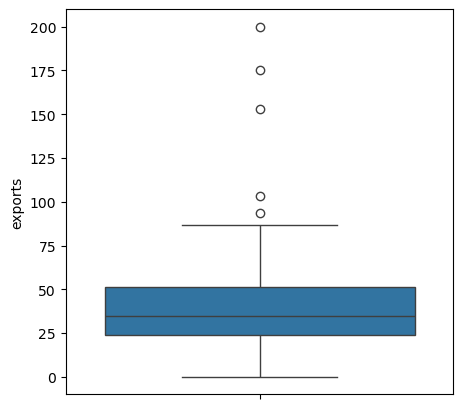

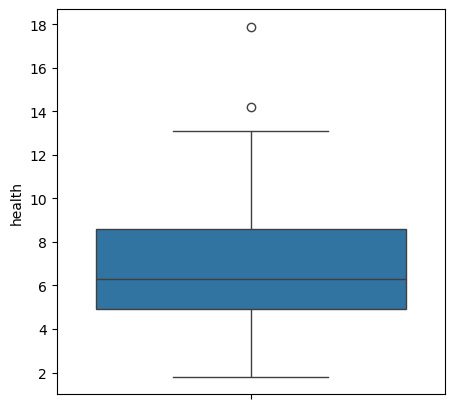

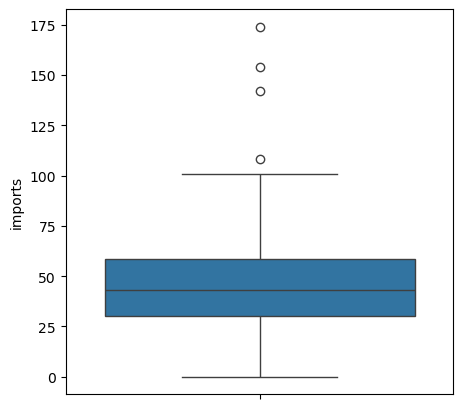

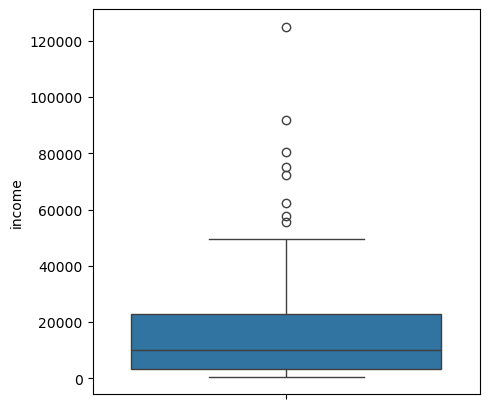

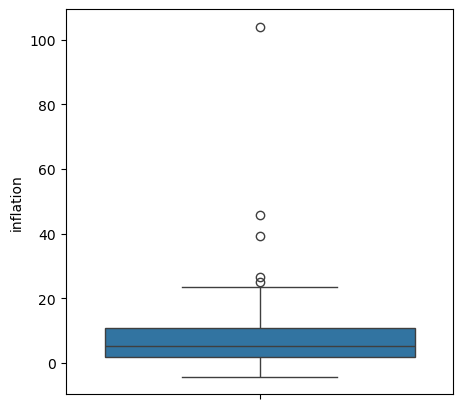

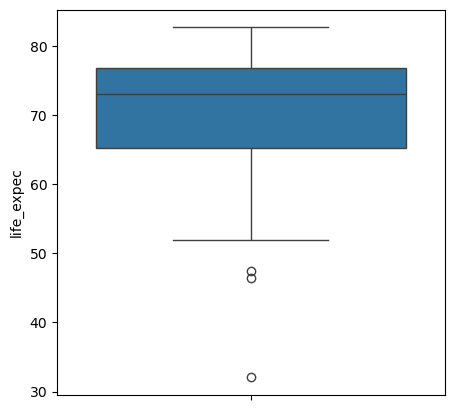

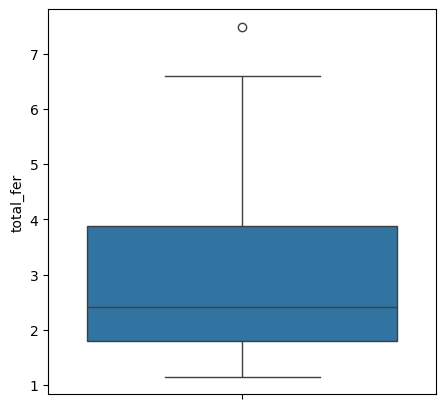

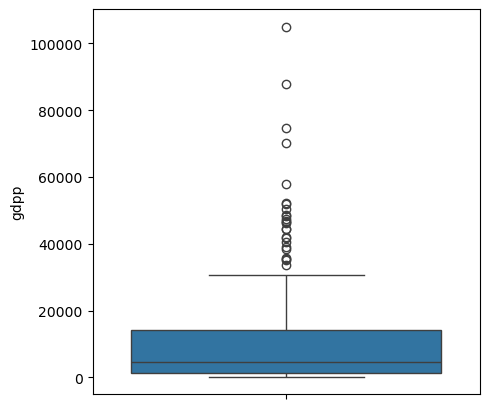

In [7]:
int_cols = df_country.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df_country, y=_)
    plt.show()

In [8]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
df_corr = df_country.drop('country',axis=1)

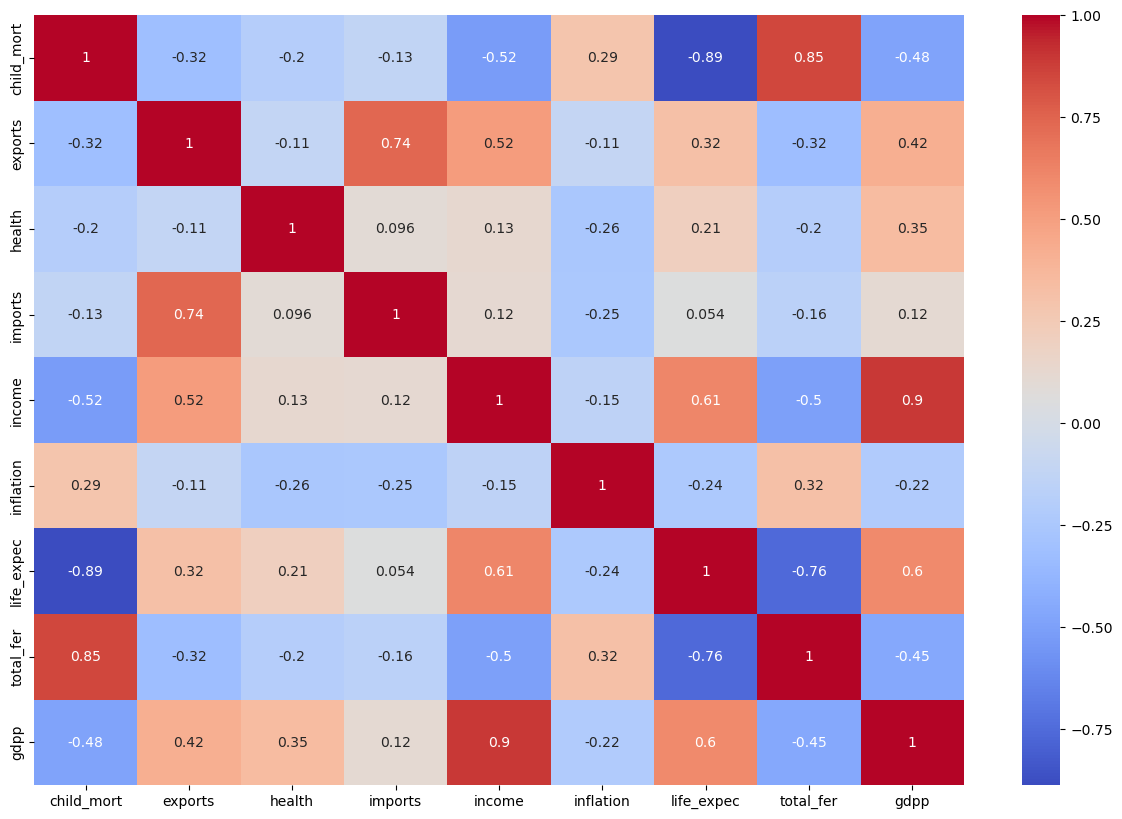

In [10]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')
plt.show()

### Escalar los Datos

In [11]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df_country_scaler = scaler.fit_transform(df_country.drop('country',axis=1))

In [12]:
df_country_scaler = pd.DataFrame(df_country_scaler, columns=df_country.drop('country',axis=1).columns)
df_country_scaler .head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca.fit(df_country_scaler)
pca_data_scaled = pca.transform(df_country_scaler)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [15]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


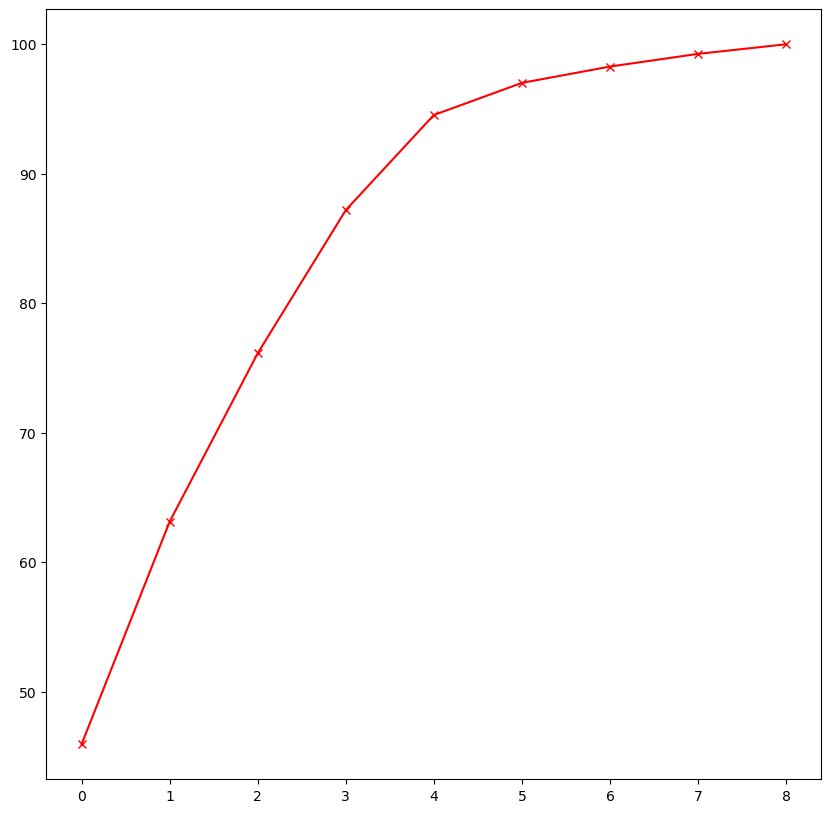

In [16]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-x')
plt.show()

In [17]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1,inplace=True)

In [18]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### Importar librerías para clustering

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### K-means

In [20]:
Sum_of_squared_distances=[]
silhouette_score_scores=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_score_scores.append(silhouette_score(pca_data_standard,y))



C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

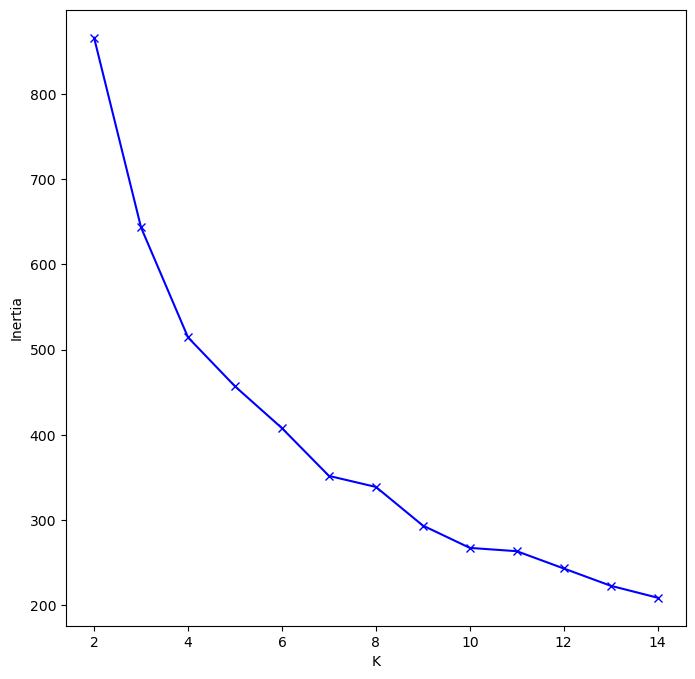

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

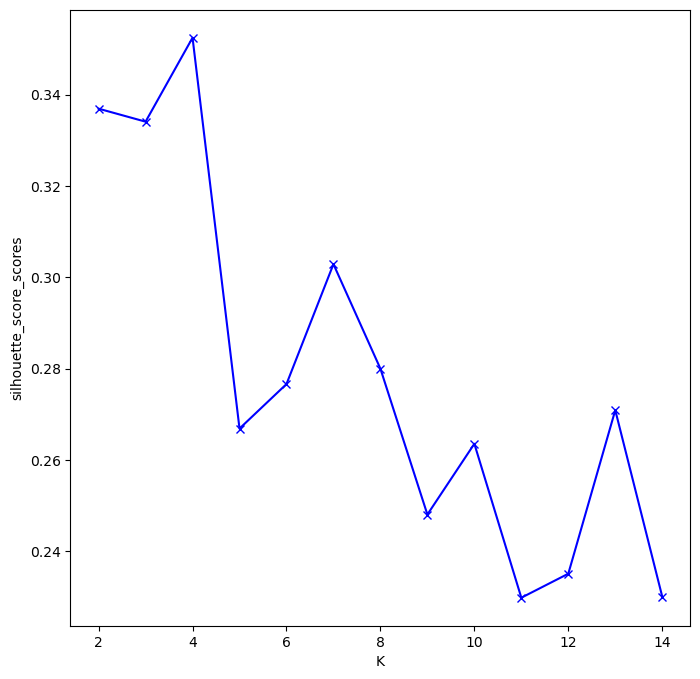

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_score_scores,'bx-')
plt.xlabel('K')
plt.ylabel('silhouette_score_scores')
plt.show()

In [23]:
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y))
df_country['Kmeans_pca'] = y

0.3549131449906333


C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Sin PCA 

In [24]:
Sum_of_squared_distances=[]
silhouette_score_scores=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    y = km.fit_predict(df_country_scaler)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_score_scores.append(silhouette_score(df_country_scaler ,y))



C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

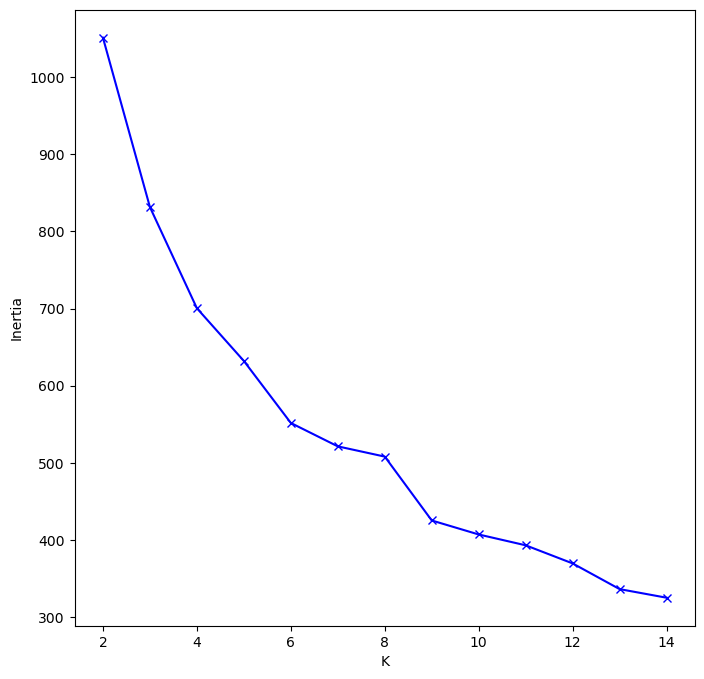

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

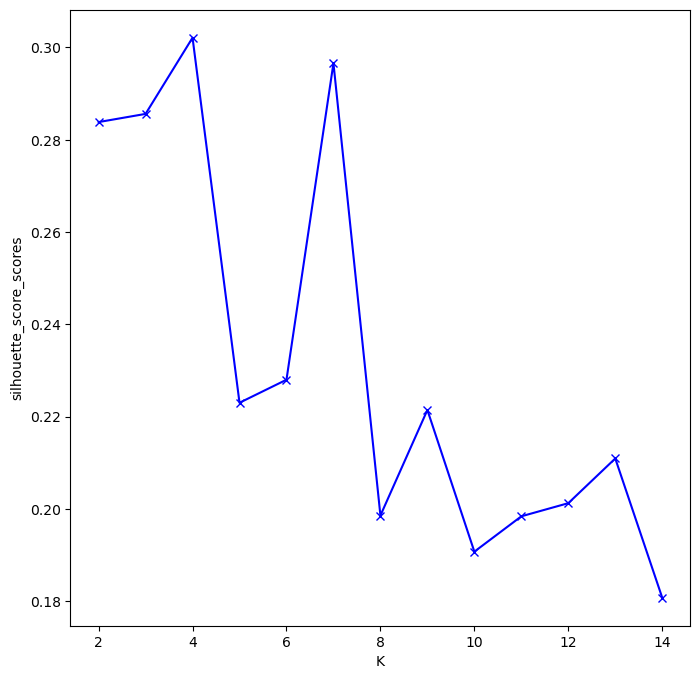

In [26]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_score_scores,'bx-')
plt.xlabel('K')
plt.ylabel('silhouette_score_scores')
plt.show()

In [34]:
km = KMeans(n_clusters=4)
y = km.fit_predict(df_country_scaler)
print(silhouette_score(df_country_scaler,y))
df_country['Kmeans_pca'] = y

0.2975089381471821


C:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Agglomerativen hierarchical Clustering

### PCA

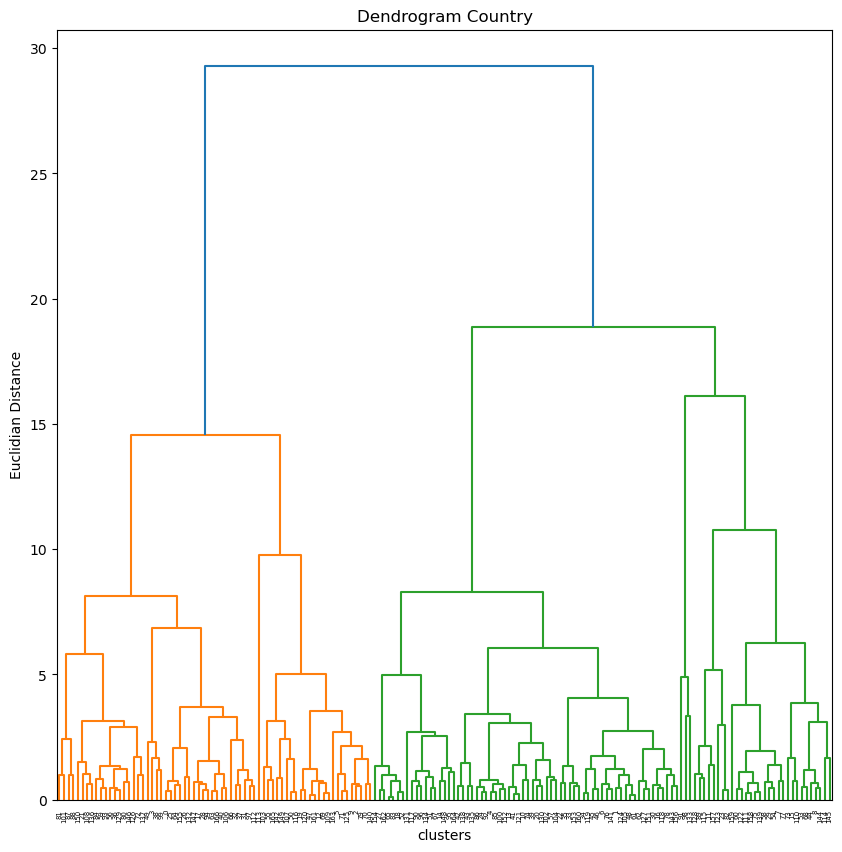

In [37]:
fig = plt.figure(figsize=(10,10))
dendrongram_plot =  dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrogram Country')
plt.xlabel('clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [49]:
 hc = AgglomerativeClustering(n_clusters=2,linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc))
df_country['hc_pca'] = y_hc

0.30701107040805264


### Sin PCA

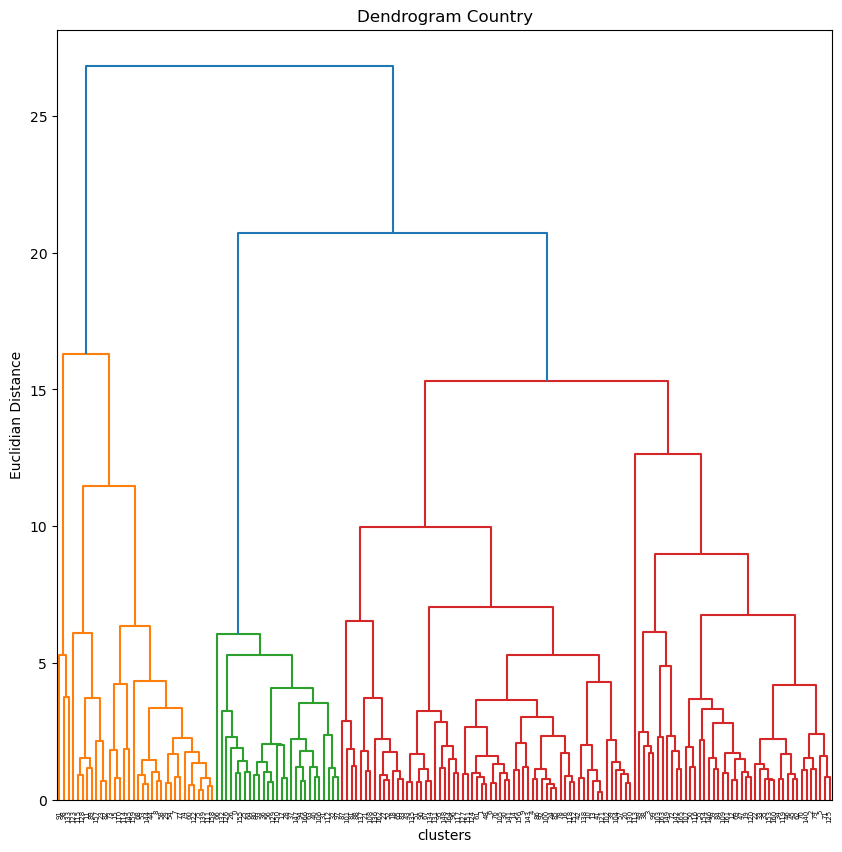

In [44]:
fig = plt.figure(figsize=(10,10))
dendrongram_plot =  dendrogram(linkage(df_country_scaler, method='ward'))
plt.title('Dendrogram Country')
plt.xlabel('clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [50]:
 hc = AgglomerativeClustering(n_clusters=,linkage='ward')
y_hc = hc.fit_predict(df_country_scaler,)
print(silhouette_score(df_country_scaler,y_hc))
df_country['hc_pca'] = y_hc

0.3153134331018189
